# Logistic 回归 和 神经网络算法
此文件中只包含测试用例 Demo

## 请先阅读 代码文档.pdf 中模型的建立、求解和逐步讲解。

更新：在作业第一次提交的基础上，又做了以下改进：

- 为 Logit算法 添加了新功能：引入自动的可变的学习率，在迭代刚开始时较大，以便于损失函数的迅速变化；在迭代中后期则尽量小，以保证精确度。
- 为 神经网络算法 添加了新功能：可通过 *figure* 函数直接画出损失函数的迭代图。

In [2]:
# 作者：吴宇翀 经济统计学 2017310836 https://wuyuchong.com

# 代码开源托管在 https://github.com/wuyuchong/DataMining/tree/master/HomeWork

## ----------------------------------------------------------------------------------------------------
# 使用 sklearn 中的数据集作为测试用例
import numpy as np
import math
from sklearn import datasets

## Logistic回归 算法测试用例

可以调整的参数包括：

- 学习率（alpha）：用于调整每次迭代的对损失函数的影响大小
- 准确度（accuracy）：作为终止迭代的评判指标
- 阈值（threshold）：用于给出概率后进行分类，默认为 50%

可以调用的函数包括：

- fit() ：用于固定学习率的拟合
- auto_fit() ：用于自动下降学习率的拟合
- predict() ：用于输出预测结果

In [3]:
import numpy as np
import math
from models.LogisticRegression import LogisticRegression

iris = datasets.load_iris()
X = iris['data']
y = iris['target']
X = X[y!=2]
y = y[y!=2]

# 将学习率固定在 0.01
Logstic = LogisticRegression(X, y, threshold = 0.5)    
Logstic.fit(alpha = 0.01, accuracy = 0.001)
print("epoch:", Logstic.epoch)
print("theta:", Logstic.thetas)
y_predict = Logstic.predict()
y_predict

epoch: 8
theta: [ 0.05586408 -0.68733466 -1.75042736  2.95078531  1.58964498]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [4]:
# 使用自动控制的下降学习率
Logstic2 = LogisticRegression(X, y, threshold = 0.5)    
Logstic2.auto_fit(accuracy = 0.001)
print("epoch:",Logstic2.epoch)
print("theta:",Logstic2.thetas)
y_predict = Logstic2.predict()
y_predict

epoch: 6
theta: [ 0.34284946 -0.23444331 -0.07464194  0.42403653  0.52057474]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## 神经网络 算法测试用例

可以调整的参数包括：

- 迭代次数（epochs）：理论上迭代次数越多越精确，耗时越长，默认为100次
- 学习率（learn_rate）：默认为0.1，可进一步调优

可以调用的函数包括：

- train() ：用于训练神经网络模型
- predict() ：用于输出预测结果
- figure() ：用于画出损失函数迭代图

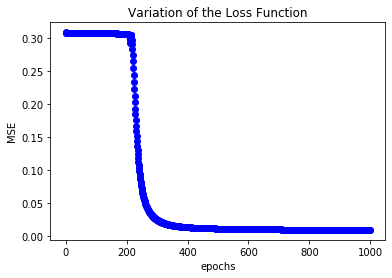

In [5]:
from models.NeuralNetwork import NeuralNetwork

iris = datasets.load_iris()
X = iris['data']
y = iris['target']
X = X[y!=2][:,0:2]
y = y[y!=2]

np.random.seed(1)
model = NeuralNetwork(X, y, learn_rate = 0.1, epochs = 1000)    
model.train()
model.predict()
model.figure()

## 详解见 代码文档.pdf 